In [15]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "features.csv"

# Load the latest version
df1 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aslanahmedov/walmart-sales-forecast",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-15-6fe3bc744122>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df1 = kagglehub.load_dataset(


In [16]:
# Set the path to the file you'd like to load
file_path = "stores.csv"

# Load the latest version
df2 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aslanahmedov/walmart-sales-forecast",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


<ipython-input-16-92f671d8c215>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df2 = kagglehub.load_dataset(


In [17]:
# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df3 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aslanahmedov/walmart-sales-forecast",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-17-efd2686d6076>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df3 = kagglehub.load_dataset(


In [18]:
import pandas as pd

result = pd.merge(df1, df2, on='Store', how='inner')

final = pd.merge(result, df3, on=['Store', 'Date'], how='inner')

In [19]:
final.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3' , 'MarkDown4', 'MarkDown5'], inplace=True)
final.drop(columns=['IsHoliday_y'], inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Fit and transform
final['Type'] = encoder.fit_transform(final['Type'])

final['IsHoliday_x'] = encoder.fit_transform(final['IsHoliday_x'])

In [21]:
#Data Preprocessing

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y=final['Date']

final.drop(columns=['Date'], inplace=True)

scaled_data = scaler.fit_transform(final)

scaled_df = pd.DataFrame(scaled_data, columns=final.columns, index=final.index)

scaled_df['Date'] = y

scaled_df['Date'] = pd.to_datetime(scaled_df['Date'])

# Extract numerical features
scaled_df['hour'] = scaled_df['Date'].dt.hour
scaled_df['day'] = scaled_df['Date'].dt.day
scaled_df['dayofweek'] = scaled_df['Date'].dt.dayofweek
scaled_df['month'] = scaled_df['Date'].dt.month

scaled_df.drop(columns=['Date'], inplace=True)

In [12]:
scaled_df.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Type', 'Size', 'Dept', 'hour', 'day', 'dayofweek',
       'month'],
      dtype='object')

In [22]:
scaled_df.drop(columns=['Store', 'Temperature','IsHoliday_x', 'Type', 'Size', 'Dept',], inplace=True)

In [23]:
tgt=scaled_df['Weekly_Sales']

scaled_df.drop(columns=['Weekly_Sales'], inplace=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, tgt, test_size=0.2, random_state=42)



In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict
y_pred = model.predict(X_test)

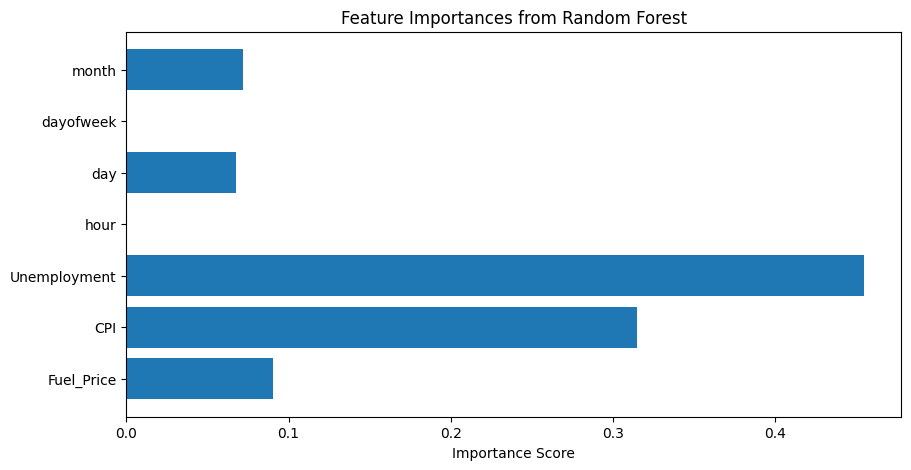

In [25]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = scaled_df.columns

# Plot Feature Importance
plt.figure(figsize=(10,5))
plt.barh(features, importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.show()

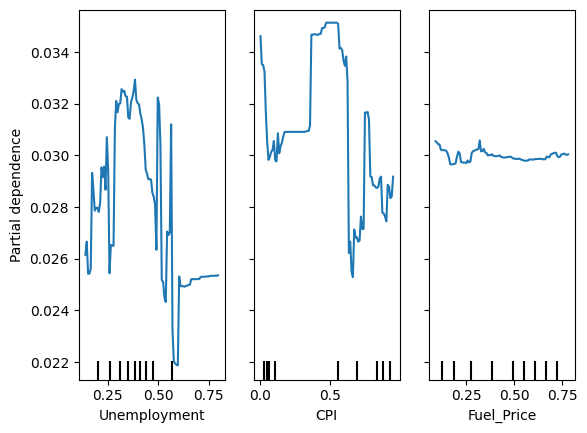

In [27]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_train, ['Unemployment', 'CPI', 'Fuel_Price'])
plt.show()